In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

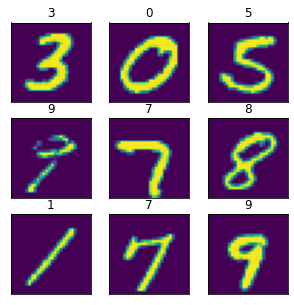

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
FFNN = FFNNClassifier(
    X=X_train,
    Y=y_train,
    cost=CostFunctions.CrossEntropy,
    activation=ActivationFunctions.Sigmoid,
    activation_out=ActivationFunctions.Softmax,
    network_shape=[30]
)

In [6]:
FFNN.train(int(len(y_train) / 32), 0.01, 100)

In [8]:
FFNN.score(y_test, X_test)

0.9125714285714286

In [ ]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30],
    activation = "logistic",
    solver='sgd'
)
SKL_NN.fit(X_train, y_train)

In [ ]:
SKL_NN.score(X_test, y_test)

In [ ]:
print(SKL_NN.n_iter_)

In [ ]:
class a:
    def __init__(self, val):
        self.val = val
        return
    
class b(a):
    def __init__(self, val):
        super().__init__(val)
        
A = a("hello")
B = b("hello")